In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [179]:
def plot_res(csva, na, csvb, nb):
    fig, axs = plt.subplots(2,len(csva), sharex=True)
    for i in range(len(csva)):
        df = pd.read_csv(csva[i], usecols=['Episodic Reward'])
        df['X'] = range(0,2000)
        dfs = df[df.X % 10 == 0]
        axs[0][i].plot(dfs.X, dfs['Episodic Reward'], label='Episodic Reward')
        dfs['rolling_avg'] = dfs['Episodic Reward'].rolling(10).mean()
        axs[0][i].plot(dfs.X, dfs['rolling_avg'], label='Average Episodic Reward')
        axs[0][i].set_title(na[i])
        axs[0][i].set_box_aspect(1)
        axs[0][i].yaxis.set_ticks(np.arange(-22, 20, (22+20) / 6 ))
        
        axs[0][i].xaxis.set_ticks(np.arange(0,2001,1000))
    
    for i in range(len(csvb)):
        df = pd.read_csv(csvb[i], usecols=['Episodic Reward'])
        df['X'] = range(0,2000)
        dfs = df[df.X % 10 == 0]
        axs[1][i].plot(dfs.X, dfs['Episodic Reward'], label='Episodic Reward')
        dfs['rolling_avg'] = dfs['Episodic Reward'].expanding().mean()
        axs[1][i].plot(dfs.X, dfs['rolling_avg'], label='Average Episodic Reward')
        axs[1][i].set_title(nb[i])
        axs[1][i].set_box_aspect(1)
        axs[1][i].yaxis.set_ticks(np.arange(0, 4000, (4000) / 6 ))
        
        axs[1][i].xaxis.set_ticks(np.arange(0,2001,1000))
        
    for ax in axs.flat:
        ax.set(xlabel='Episodes', ylabel='Reward')
    for ax in axs.flat:
        ax.label_outer()
    
    for ax in axs.flat:
        ax.set(xlabel='Episodes', ylabel='Reward')
    for ax in axs.flat:
        ax.label_outer()
    fig.savefig('training_rewards.png')

In [180]:
pong, nap = ['data/Pong-ram-v0_DQN-FC.csv','data/Pong-ram-v0_DQN-CNN.csv','data/Pong-ram-v0_DQN-Single.csv','data/Pong-ram-v0_DQN-Single-Equal-Neuron.csv'], ['DFC','CNN','SHLA','SHLB']

In [181]:
ast, naa = ['data/Asteroids-ram-v0_DQN-FC-Asteroid.csv','data/Asteroids-ram-v0_DQN-CNN-Asteroid.csv', 'data/Asteroids-ram-v0_DQN-Single-Asteroid.csv', 'data/Asteroids-ram-v0_DQN-Single-Asteroid-Small.csv'],['DFC','CNN','SHLA','SHLB']

/tmp/ipykernel_230478/2416428360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['rolling_avg'] = dfs['Episodic Reward'].rolling(10).mean()
/tmp/ipykernel_230478/2416428360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['rolling_avg'] = dfs['Episodic Reward'].rolling(10).mean()
/tmp/ipykernel_230478/2416428360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

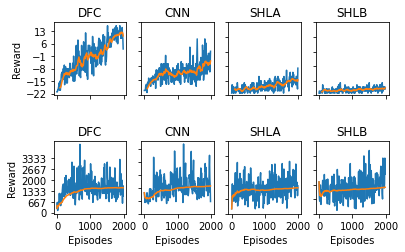

In [182]:
plot_res(pong, nap, ast, naa)

In [183]:
def plot_res2(csvs, names):
    fig, axs = plt.subplots(1,len(csvs),sharey=True, sharex=True)
    
    df = pd.read_csv(csvs[0], usecols=['Episodic Reward'])
    df['X'] = range(0,1000)
    dfs = df[df.X % 10 == 0]
    axs.plot(dfs.X, dfs['Episodic Reward'], label='Episodic Reward')
    dfs['rolling_avg'] = dfs['Episodic Reward'].expanding().mean()
    axs.plot(dfs.X, dfs['rolling_avg'], label='Average Episodic Reward')
    axs.set_title(names[0])
    axs.set_box_aspect(1)
    start, end = axs.get_ylim()
    axs.yaxis.set_ticks(np.arange(start, end, (end - start) / 6 ))

    axs.xaxis.set_ticks(np.arange(0,1001,500))
        

/tmp/ipykernel_230478/3690185751.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['rolling_avg'] = dfs['Episodic Reward'].expanding().mean()


TypeError: plot_res() missing 2 required positional arguments: 'csvb' and 'nb'

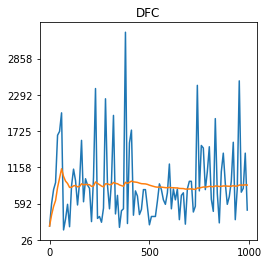

In [184]:
plot_res2(['data/MsPacman-ram-v0_DQN-FC-Pac.csv'],['DFC'])
plot_res(['data/Breakout-ram-v0_DQN-FC-Break.csv', 'data/SpaceInvaders-ram-v0_DQN-FC-Space.csv'],['DFC','DFC'])

Mean Reward: 9.436


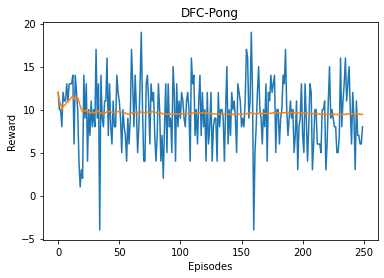

In [185]:
def plot_test(csv,name):
    df = pd.read_csv(csv, usecols=['Episodic Reward'])
    df['X'] = range(0,len(df))
    plt.plot(df.X, df['Episodic Reward'], label='name')
    df['rolling_avg'] = df['Episodic Reward'].expanding().mean()
    plt.plot(df.X, df['rolling_avg'], label='Average Episodic Reward')
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.title(name)
    d = df['Episodic Reward'].mean()
    print(f'Mean Reward: {d}')
plot_test('data/test/DFC-Pong.csv', 'DFC-Pong')

Mean Reward: -3.928


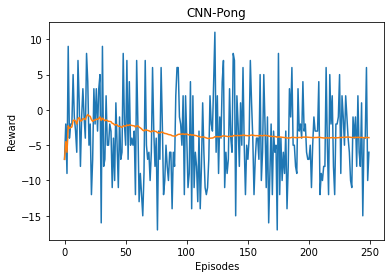

In [186]:
plot_test('data/test/CNN-Pong.csv', 'CNN-Pong')

Mean Reward: -20.976


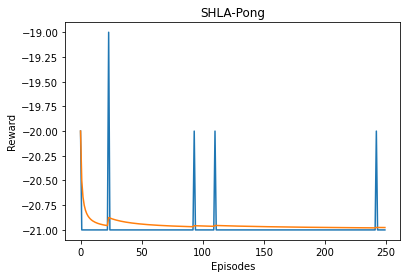

In [187]:
plot_test('data/test/SHLA-Pong.csv', 'SHLA-Pong')

Mean Reward: -21.0


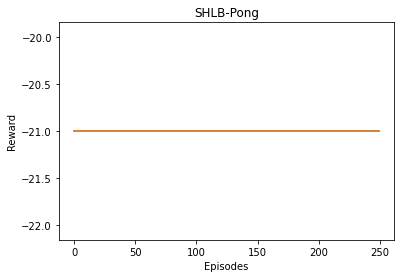

In [188]:
plot_test('data/test/SHLB-Pong.csv', 'SHLB-Pong')

Mean Reward: 1754.16


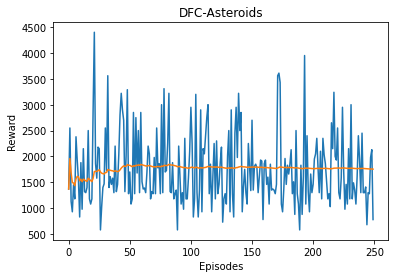

In [189]:
plot_test('data/test/DFC-Asteroids.csv', 'DFC-Asteroids')

Mean Reward: 1606.76


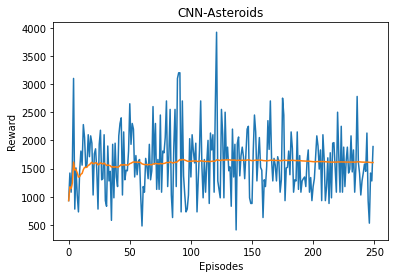

In [190]:
plot_test('data/test/CNN-Asteroids.csv', 'CNN-Asteroids')

Mean Reward: 1032.68


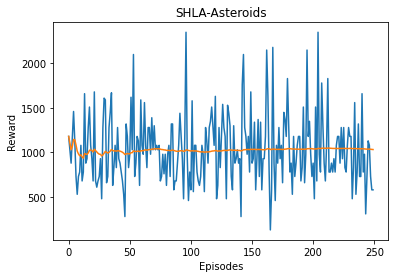

In [191]:
plot_test('data/test/SHLA-Asteroids.csv', 'SHLA-Asteroids')

Mean Reward: 1557.24


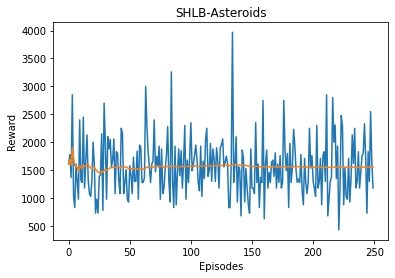

In [192]:
plot_test('data/test/SHLB-Asteroids.csv', 'SHLB-Asteroids')

In [162]:
import os
from os import listdir
from os.path import isfile, join
mypath = '/home/rileyp/github/CS4824-Final-Project/model/final'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for x in onlyfiles:
    print(x)

Pong-ram-v0_DQN-Single-SmallFinal.pt
Asteroids-ram-v0_DQN-CNN-AsteroidFinal.pt
Pong-ram-v0_DQN-CNNFinal.pt
Asteroids-ram-v0_DQN-Single-Asteroid-SmallFinal.pt
Asteroids-ram-v0_DQN-Single-AsteroidFinal.pt
Asteroids-ram-v0_DQN-FC-AsteroidFinal.pt
Pong-ram-v0_DQN-SingleFinal.pt
Pong-ram-v0_DQN-FCFinal.pt


In [155]:
os.getcwd()


'/home/rileyp/github/CS4824-Final-Project'